In [3]:
%matplotlib inline

In [4]:
import datetime # Tipo de dato para fechas y horas
import pandas as pd # Manejo de datos tabulados
import numpy as np # Algebra Lineal y operaciones matematicas
import matplotlib.pyplot as plt # Graficos de datos
import seaborn as sns # Graficos estadisticos
import pandas_profiling as ppr # ?????????
import geopandas as gpd # Pandas para datos geograficos (Mapas!!)
from fitter import Fitter # Ajuste de distribuciones de probs

In [5]:
# Leemos los datos seleccionados
df_main = pd.read_csv('../data/economy-and-growth_per.csv')
df_external = pd.read_csv('../data/external-debt_per.csv')
df_financial = pd.read_csv('../data/financial-sector_per.csv')
df_indicadores = pd.read_csv('../data/indicators_per.csv')
df_hdro = pd.read_csv('../data/hdro_indicators_per.csv')
df_health = pd.read_csv('../data/health_per.csv')
df_infrastructure = pd.read_csv('../data/infrastructure_per.csv')
df_energy = pd.read_csv('../data/energy-and-mining_per.csv')





In [6]:
df_main.head()

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
0,#country+name,#country+code,#date+year,#indicator+name,#indicator+code,#indicator+value+num
1,Peru,PER,2014,Annualized Mean Income Growth (2004-2014),5.0.AMeanIncGr.All,4.07865692
2,Peru,PER,2014,Annualized Mean Income Growth Bottom 40 Percen...,5.0.AMeanIncGr.B40,6.48736384
3,Peru,PER,2009,Annualized Mean Income Growth (2004-2009),5.1.AMeanIncGr.All,5.05714401
4,Peru,PER,2009,Annualized Mean Income Growth Bottom 40 Percen...,5.1.AMeanIncGr.B40,7.20753731


In [ ]:
df_external.head()

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
0,#country+name,#country+code,#date+year,#indicator+name,#indicator+code,#indicator+value+num
1,Peru,PER,2020,"Imports of goods, services and primary income ...",BM.GSR.TOTL.CD,50176078373.8539
2,Peru,PER,2019,"Imports of goods, services and primary income ...",BM.GSR.TOTL.CD,63352690362.2345
3,Peru,PER,2018,"Imports of goods, services and primary income ...",BM.GSR.TOTL.CD,64891853578.1998
4,Peru,PER,2017,"Imports of goods, services and primary income ...",BM.GSR.TOTL.CD,60304621972.2648


In [ ]:
df_indicadores.head()

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
0,#country+name,#country+code,#date+year,#indicator+name,#indicator+code,#indicator+value+num
1,Peru,PER,1995,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,13191
2,Peru,PER,1994,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,13000
3,Peru,PER,1993,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,13000
4,Peru,PER,1992,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,12800


In [7]:
df_hdro.head()

,#country+code,#country+name,#indicator+code,#indicator+name,#indicator+value+num,#date+year
0,PER,Peru,38406,Multidimensional poverty index (MPI),0.029186,2008-2019
1,PER,Peru,38506,"Population in multidimensional poverty, intens...",39.591690,2008-2019
2,PER,Peru,38606,"Population in multidimensional poverty, headco...",7.371848,2008-2019
3,PER,Peru,39006,"Population living below income poverty line, n...",20.500000,2008-2019
4,PER,Peru,43606,"Internet users, total (% of population)",52.540300,2018


In [8]:
df_health.head()

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
0,#country+name,#country+code,#date+year,#indicator+name,#indicator+code,#indicator+value+num
1,Peru,PER,2016,Proportion of women subjected to physical and/...,SG.VAW.1549.ZS,10.8
2,Peru,PER,2012,Women who believe a husband is justified in be...,SG.VAW.ARGU.ZS,0.8
3,Peru,PER,2011,Women who believe a husband is justified in be...,SG.VAW.ARGU.ZS,0.6
4,Peru,PER,2010,Women who believe a husband is justified in be...,SG.VAW.ARGU.ZS,1


In [9]:
df_infrastructure.head()

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
0,#country+name,#country+code,#date+year,#indicator+name,#indicator+code,#indicator+value+num
1,Peru,PER,2020,"ICT service exports (BoP, current US$)",BX.GSR.CCIS.CD,105292041.06448
2,Peru,PER,2019,"ICT service exports (BoP, current US$)",BX.GSR.CCIS.CD,112561099.593895
3,Peru,PER,2018,"ICT service exports (BoP, current US$)",BX.GSR.CCIS.CD,108513658.206156
4,Peru,PER,2017,"ICT service exports (BoP, current US$)",BX.GSR.CCIS.CD,147909108.62506


In [10]:
df_energy.head()

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
0,#country+name,#country+code,#date+year,#indicator+name,#indicator+code,#indicator+value+num
1,Peru,PER,2015,Energy intensity level of primary energy (MJ/$...,EG.EGY.PRIM.PP.KD,2.79098842070488
2,Peru,PER,2014,Energy intensity level of primary energy (MJ/$...,EG.EGY.PRIM.PP.KD,2.78241677083545
3,Peru,PER,2013,Energy intensity level of primary energy (MJ/$...,EG.EGY.PRIM.PP.KD,2.46188419857603
4,Peru,PER,2012,Energy intensity level of primary energy (MJ/$...,EG.EGY.PRIM.PP.KD,2.61583612032158


#Tiene 12387 observaciones, 0 a 12386

In [ ]:
df_indicadores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96248 entries, 0 to 96247
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country Name    96248 non-null  object
 1   Country ISO3    96248 non-null  object
 2   Year            96248 non-null  object
 3   Indicator Name  96248 non-null  object
 4   Indicator Code  96248 non-null  object
 5   Value           96248 non-null  object
dtypes: object(6)
memory usage: 4.4+ MB


In [ ]:
# Validar integridad del identificador "único"
len(df_main['Indicator Code'].unique()), df_main.shape[0]

(269, 12387)

In [ ]:
filtro_duplicados = df_main['Indicator Code'].duplicated(keep=False)
df_main[filtro_duplicados]['Indicator Code'].value_counts().head()

NE.EXP.GNFS.KN    61
NE.DAB.TOTL.KD    61
NE.DAB.TOTL.ZS    61
NE.EXP.GNFS.CD    61
NE.EXP.GNFS.CN    61
Name: Indicator Code, dtype: int64

In [ ]:
# Numero de valores perdidos / missings
value_na_count = df_main['Value'].isna().sum()
print(value_na_count)
print(round(value_na_count/ df_main.shape[0] * 100, 2), '%')


0
0.0 %


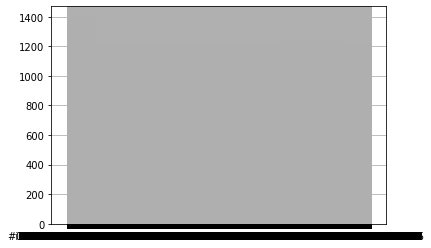

In [9]:
df_main['Value'].hist()
plt.show()

In [10]:
horizontal_stack = pd.concat([df_main, df_external,df_financial,df_indicadores], axis=1)

In [11]:
vertical_stack = pd.concat([df_main, df_external,df_financial,df_indicadores], axis=0)